# Teoría de Grafos

In [155]:
import networkx as nx
import matplotlib.pyplot as plt


## Recursos

- [Documentación de NetworkX](https://networkx.org/documentation/stable/)
- [Tutorial de NetworkX](https://networkx.org/documentation/stable/tutorial.html)
- [Referencia API de NetworkX](https://networkx.org/documentation/stable/reference/index.html)
- [Gephi - Software de Visualización de Grafos](https://gephi.org/)


In [156]:
def draw_graph(G):
    """
    Draws a graph using NetworkX and Matplotlib.
    Works with both Graph and DiGraph.
    Automatically displays edge weights if present.

    Parameters:
    -----------
    G : networkx.Graph or networkx.DiGraph
        The graph to draw
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    # Dibujar con flechas si es un grafo dirigido
    if G.is_directed():
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_color="lightblue",
            node_size=800,
            font_size=16,
            font_weight="bold",
            edge_color="black",
            width=2,
            arrows=True,
            arrowsize=20,
            arrowstyle="->",
            connectionstyle="arc3,rad=0.1",
        )
    else:
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_color="lightblue",
            node_size=800,
            font_size=16,
            font_weight="bold",
            edge_color="black",
            width=2,
        )

    # Dibujar los pesos de las aristas si existen
    edge_labels = nx.get_edge_attributes(G, "weight")
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    plt.axis("off")
    plt.show()

## Grafo (Graph)

In [157]:
# Crear un grafo con N=4 nodos y L=4 aristas
G = nx.Graph()

# Agregar nodos
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

# Agregar aristas
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(2, 4)

# Imprimir información del grafo
print(f"Cantidad de nodos (N): {G.number_of_nodes()}")
print(f"Cantidad de aristas (L): {G.number_of_edges()}")
print(f"Aristas: {list(G.edges())}")


Cantidad de nodos (N): 4
Cantidad de aristas (L): 4
Aristas: [(1, 2), (1, 3), (2, 3), (2, 4)]



Grado de cada nodo: {1: 2, 2: 3, 3: 2, 4: 1}
Grado promedio: 2.0
Grado promedio (usando 2L/N): 2.0


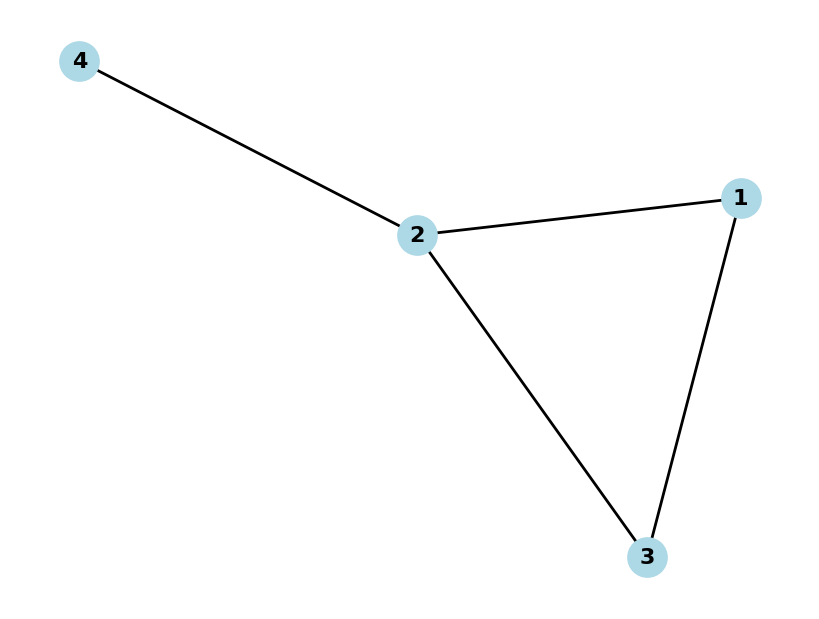

In [158]:
# Calcular e imprimir información sobre grados
# (necesitamos convertir los grados a un diccionario para calcular el promedio)
degrees = dict(G.degree())
print(f"\nGrado de cada nodo: {degrees}")

# Calcular el grado promedio
avg_degree = sum(degrees.values()) / G.number_of_nodes()
print(f"Grado promedio: {avg_degree}")

# Fórmula alternativa: <k> = 2L/N
avg_degree_formula = (2 * G.number_of_edges()) / G.number_of_nodes()
print(f"Grado promedio (usando 2L/N): {avg_degree_formula}")

# Dibujar el grafo
draw_graph(G)

In [159]:
# Grabar grafo como lista de adyacencia
nx.write_adjlist(G, "networks/graph_adjacency_list.txt")


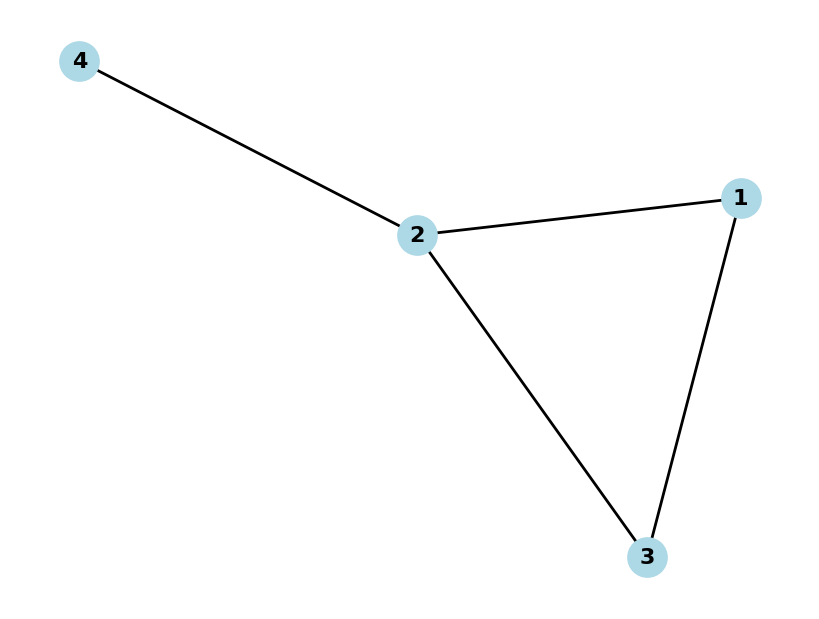

In [160]:
# Cargar grafo desde lista de adyacencia
G = nx.read_adjlist("networks/graph_adjacency_list.txt")

draw_graph(G)

## Grafo Dirigido (DiGraph)

Cantidad de nodos (N): 4
Cantidad de aristas (L): 4
Aristas: [(1, 2), (1, 3), (2, 3), (2, 4)]


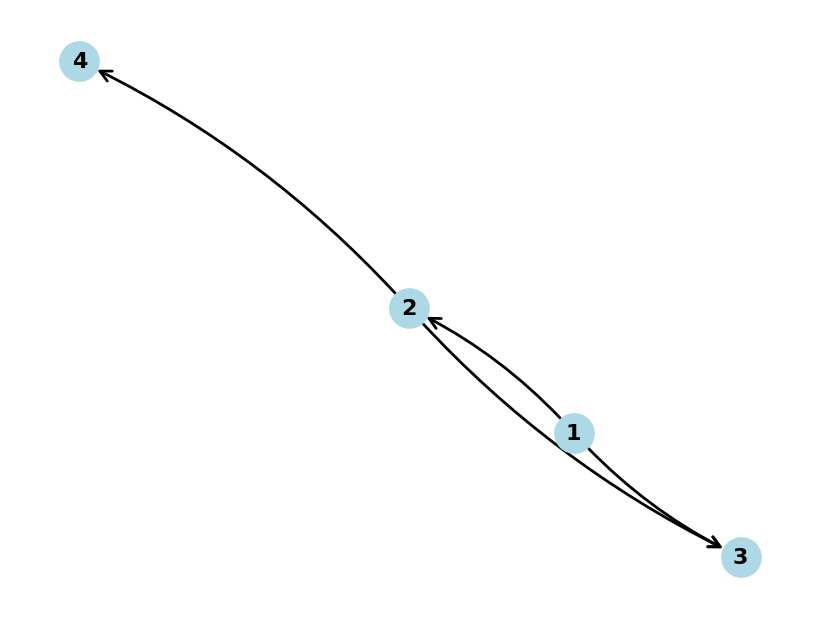

In [161]:
# Crear un grafo dirigido (DiGraph) con N=4 nodos y L=4 aristas
DG = nx.DiGraph()

# Agregar aristas dirigidas (los nodos se agregan automáticamente)
edges = [(1, 2), (1, 3), (2, 3), (2, 4)]
DG.add_edges_from(edges)

# Imprimir información del grafo
print(f"Cantidad de nodos (N): {DG.number_of_nodes()}")
print(f"Cantidad de aristas (L): {DG.number_of_edges()}")
print(f"Aristas: {list(DG.edges())}")

# Dibujar el grafo dirigido
draw_graph(DG)

Grafo dirigido con aristas bidireccionales:
Aristas: [(1, 2), (1, 3), (2, 1), (2, 4), (3, 2), (4, 2)]


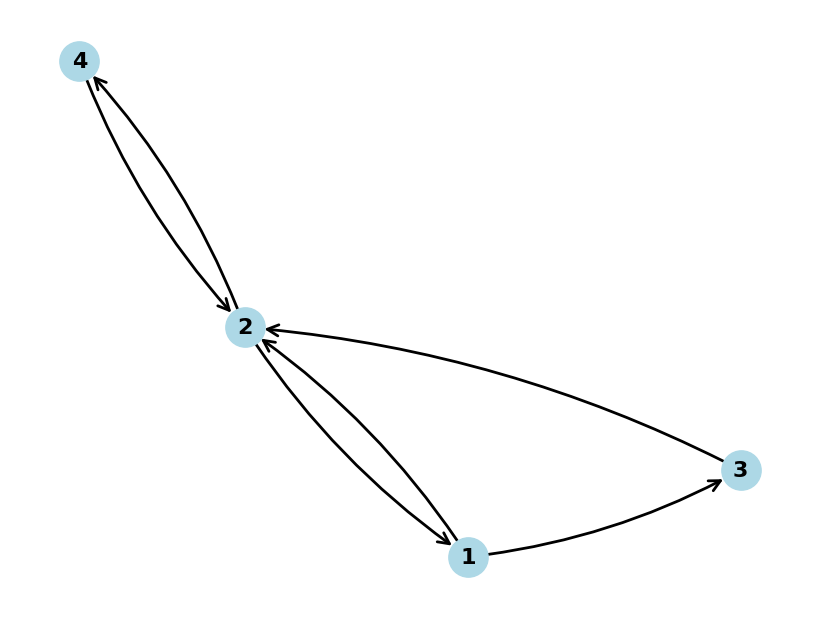

In [162]:
# Ejemplo: Grafo dirigido con aristas bidireccionales
DG2 = nx.DiGraph()

# Agregar aristas en ambas direcciones para algunas conexiones
edges = [
    (1, 2),
    (2, 1),  # Bidireccional entre 1 y 2
    (1, 3),  # Solo 1 -> 3
    (3, 2),  # Solo 3 -> 2
    (2, 4),
    (4, 2),
]  # Bidireccional entre 2 y 4

DG2.add_edges_from(edges)

print(f"Grafo dirigido con aristas bidireccionales:")
print(f"Aristas: {list(DG2.edges())}")
draw_graph(DG2)

# Grafo Ponderado (Weighted Graph)

Cantidad de nodos (N): 4
Cantidad de aristas (L): 4
Aristas con pesos: [(1, 2, 5), (1, 3, 3), (2, 3, 7), (2, 4, 2)]


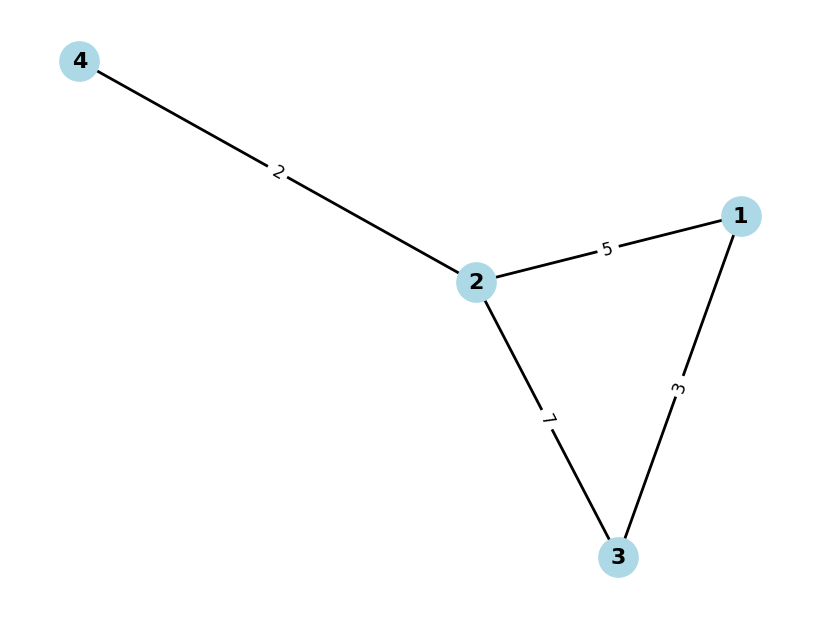

In [163]:
# Crear un grafo ponderado con N=4 nodos y L=4 aristas
GW = nx.Graph()

# Agregar nodos
GW.add_node(1)
GW.add_node(2)
GW.add_node(3)
GW.add_node(4)

# Agregar aristas
GW.add_edge(1, 2, weight=5)
GW.add_edge(1, 3, weight=3)
GW.add_edge(2, 3, weight=7)
GW.add_edge(2, 4, weight=2)

# Imprimir información del grafo
print(f"Cantidad de nodos (N): {GW.number_of_nodes()}")
print(f"Cantidad de aristas (L): {GW.number_of_edges()}")
print(f"Aristas con pesos: {list(GW.edges(data='weight'))}")

# Dibujar el grafo ponderado
draw_graph(GW)

In [164]:
# Grabar grafo como lista de ejes con pesos
nx.write_weighted_edgelist(GW, "networks/graph_weighted_edges.txt")

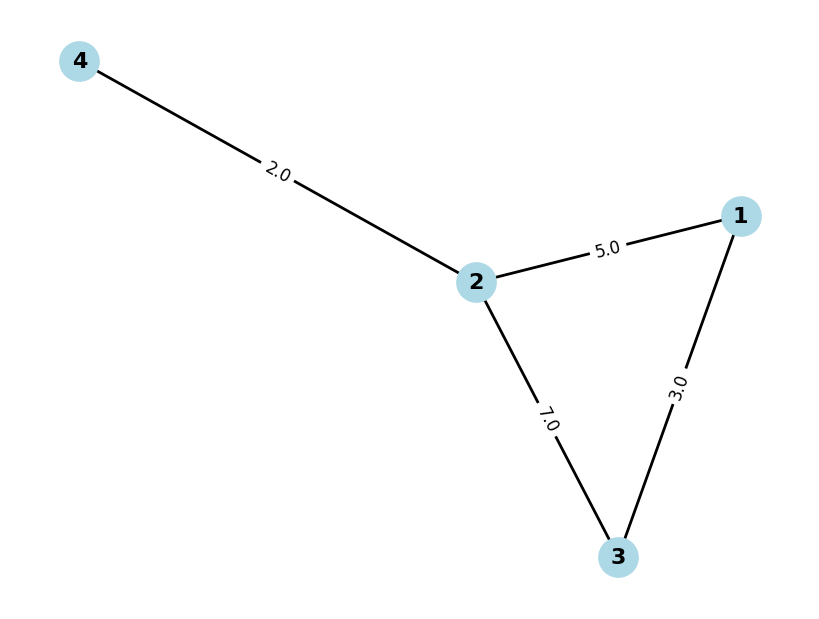

In [165]:
# Cargar grafo lista de ejes con pesos
GW_weighted = nx.read_weighted_edgelist(
    "networks/graph_weighted_edges.txt",
    create_using=nx.Graph(),
)

draw_graph(GW_weighted)

## Red de llamadas telefónicas

In [166]:
# Cargar el grafo de llamadas telefónicas desde edgelist como grafo dirigido
phone_graph = nx.read_edgelist(
    "networks/phonecalls.edgelist.txt", create_using=nx.DiGraph()
)

# Imprimir información básica sobre el grafo
print(f"Red de llamadas telefónicas (Dirigida):")
print(f"Cantidad de nodos (N): {phone_graph.number_of_nodes()}")
print(f"Cantidad de aristas (L): {phone_graph.number_of_edges()}")

# Calcular e imprimir estadísticas de grados para grafos dirigidos
in_degrees = dict(phone_graph.in_degree())
out_degrees = dict(phone_graph.out_degree())

avg_in_degree = sum(in_degrees.values()) / phone_graph.number_of_nodes()
avg_out_degree = sum(out_degrees.values()) / phone_graph.number_of_nodes()

print(f"\nGrado de entrada promedio: {avg_in_degree:.2f}")
print(f"Grado de salida promedio: {avg_out_degree:.2f}")

# Mostrar grados mínimos y máximos
print(
    f"\nRango de grado de entrada: {min(in_degrees.values())} a {max(in_degrees.values())}"
)
print(
    f"Rango de grado de salida: {min(out_degrees.values())} a {max(out_degrees.values())}"
)

Red de llamadas telefónicas (Dirigida):
Cantidad de nodos (N): 36595
Cantidad de aristas (L): 91826

Grado de entrada promedio: 2.51
Grado de salida promedio: 2.51

Rango de grado de entrada: 0 a 77
Rango de grado de salida: 0 a 41


## Distribución de Grados

La distribución de grados, $p_k$, es la probabilidad de que un nodo seleccionado aleatoriamente en la red tenga grado $k$.

Para una red con $N$ nodos, la distribución de grados es el histograma normalizado:

$$p_k = \frac{N_k}{N}$$

donde $N_k$ es la cantidad de nodos con grado $k$.

El grado promedio puede calcularse como:

$$\langle k \rangle = \sum_{k=0}^{\infty} k \cdot p_k$$


In [167]:
import numpy as np

# Obtener diccionarios de grados para la red telefónica
in_degrees = dict(phone_graph.in_degree())
out_degrees = dict(phone_graph.out_degree())

# Calcular el grado total (entrada + salida) para cada nodo
total_degrees = {}
for node in phone_graph.nodes():
    total_degrees[node] = in_degrees[node] + out_degrees[node]

# Cantidad total de nodos
N = phone_graph.number_of_nodes()

# --- Distribución de grado de entrada ---
# Contar cuántos nodos tienen cada valor de grado (N_k)
degree_counts_in = {}
for degree in in_degrees.values():
    if degree in degree_counts_in:
        degree_counts_in[degree] += 1
    else:
        degree_counts_in[degree] = 1

# Crear arrays para k y p_k
k_in = np.array(sorted(degree_counts_in.keys()))
p_k_in = np.zeros(len(k_in))
for i, k in enumerate(k_in):
    p_k_in[i] = degree_counts_in[k] / N

# --- Distribución de grado de salida ---
degree_counts_out = {}
for degree in out_degrees.values():
    if degree in degree_counts_out:
        degree_counts_out[degree] += 1
    else:
        degree_counts_out[degree] = 1

k_out = np.array(sorted(degree_counts_out.keys()))
p_k_out = np.zeros(len(k_out))
for i, k in enumerate(k_out):
    p_k_out[i] = degree_counts_out[k] / N

# --- Distribución de grado total ---
degree_counts_total = {}
for degree in total_degrees.values():
    if degree in degree_counts_total:
        degree_counts_total[degree] += 1
    else:
        degree_counts_total[degree] = 1

k_total = np.array(sorted(degree_counts_total.keys()))
p_k_total = np.zeros(len(k_total))
for i, k in enumerate(k_total):
    p_k_total[i] = degree_counts_total[k] / N

# Calcular grado promedio usando: <k> = sum(k * p_k)
avg_k_in = np.sum(k_in * p_k_in)
avg_k_out = np.sum(k_out * p_k_out)
avg_k_total = np.sum(k_total * p_k_total)

print("Análisis de Distribución de Grados:")
print("=" * 50)
print(f"\nDistribución de Grado de Entrada:")
print(f"  Grado promedio <k_in> = {avg_k_in:.4f}")
print(f"  Rango de grados: {k_in.min()} a {k_in.max()}")
print(f"  Cantidad de grados diferentes: {len(k_in)}")

print(f"\nDistribución de Grado de Salida:")
print(f"  Grado promedio <k_out> = {avg_k_out:.4f}")
print(f"  Rango de grados: {k_out.min()} a {k_out.max()}")
print(f"  Cantidad de grados diferentes: {len(k_out)}")

print(f"\nDistribución de Grado Total:")
print(f"  Grado promedio <k_total> = {avg_k_total:.4f}")
print(f"  Rango de grados: {k_total.min()} a {k_total.max()}")
print(f"  Cantidad de grados diferentes: {len(k_total)}")

# Verificar normalización: la suma de p_k debe ser igual a 1
print(f"\nVerificación (la suma de p_k debe ser 1.0):")
print(f"  sum(p_k_in) = {np.sum(p_k_in):.6f}")
print(f"  sum(p_k_out) = {np.sum(p_k_out):.6f}")
print(f"  sum(p_k_total) = {np.sum(p_k_total):.6f}")

Análisis de Distribución de Grados:

Distribución de Grado de Entrada:
  Grado promedio <k_in> = 2.5092
  Rango de grados: 0 a 77
  Cantidad de grados diferentes: 32

Distribución de Grado de Salida:
  Grado promedio <k_out> = 2.5092
  Rango de grados: 0 a 41
  Cantidad de grados diferentes: 35

Distribución de Grado Total:
  Grado promedio <k_total> = 5.0185
  Rango de grados: 1 a 102
  Cantidad de grados diferentes: 55

Verificación (la suma de p_k debe ser 1.0):
  sum(p_k_in) = 1.000000
  sum(p_k_out) = 1.000000
  sum(p_k_total) = 1.000000


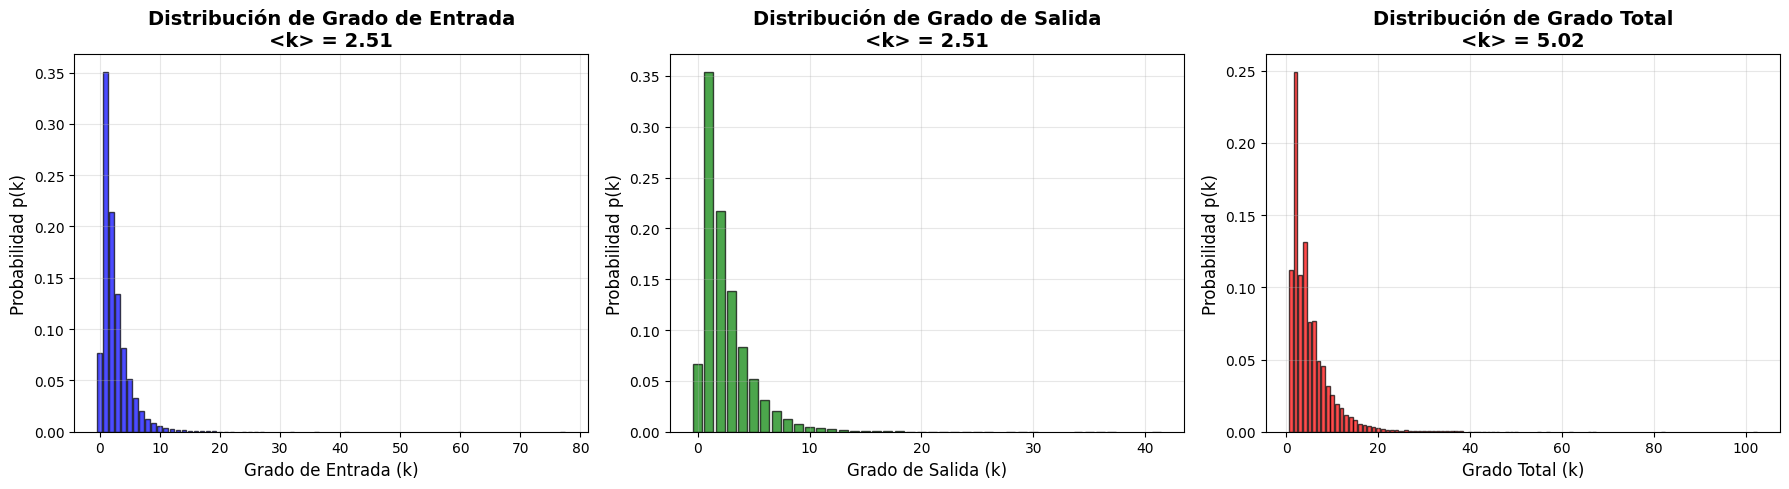

In [168]:
# Visualizar las distribuciones de grados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de Grado de Entrada
axes[0].bar(k_in, p_k_in, width=0.8, alpha=0.7, color="blue", edgecolor="black")
axes[0].set_xlabel("Grado de Entrada (k)", fontsize=12)
axes[0].set_ylabel("Probabilidad p(k)", fontsize=12)
axes[0].set_title(
    f"Distribución de Grado de Entrada\n<k> = {avg_k_in:.2f}",
    fontsize=14,
    fontweight="bold",
)
axes[0].grid(True, alpha=0.3)

# Distribución de Grado de Salida
axes[1].bar(k_out, p_k_out, width=0.8, alpha=0.7, color="green", edgecolor="black")
axes[1].set_xlabel("Grado de Salida (k)", fontsize=12)
axes[1].set_ylabel("Probabilidad p(k)", fontsize=12)
axes[1].set_title(
    f"Distribución de Grado de Salida\n<k> = {avg_k_out:.2f}",
    fontsize=14,
    fontweight="bold",
)
axes[1].grid(True, alpha=0.3)

# Distribución de Grado Total
axes[2].bar(k_total, p_k_total, width=0.8, alpha=0.7, color="red", edgecolor="black")
axes[2].set_xlabel("Grado Total (k)", fontsize=12)
axes[2].set_ylabel("Probabilidad p(k)", fontsize=12)
axes[2].set_title(
    f"Distribución de Grado Total\n<k> = {avg_k_total:.2f}",
    fontsize=14,
    fontweight="bold",
)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()